In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

SEED = 666

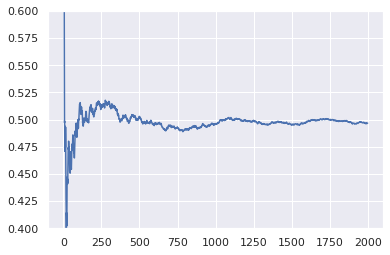

In [2]:
# S1
from spellbook import uniform_0_1, run_simulation
np.random.seed(SEED)

def h(x):
    return x

M = 2000

estimated_values, _ = run_simulation(h, uniform_0_1, uniform_0_1, M)
plt.plot(estimated_values)
plt.ylim(0.4, 0.6)
plt.show()

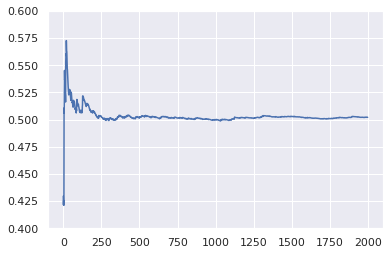

In [3]:
# S2
from spellbook import Distribution, g_polynomial
np.random.seed(SEED)

M = 2000

estimated_values, _ = run_simulation(h, g_polynomial, uniform_0_1, M)
plt.plot(estimated_values)
plt.ylim(0.4, 0.6)
plt.show()

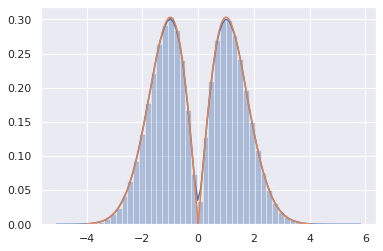

In [4]:
# S3 sampling from g_tilde
from spellbook import g_tilde, sample_from_distribution
np.random.seed(SEED)

x = np.linspace(-4, 4, 10000)
sns.distplot(sample_from_distribution(g_tilde, 1000000))
plt.plot(x, g_tilde.pdf(x))
plt.show()

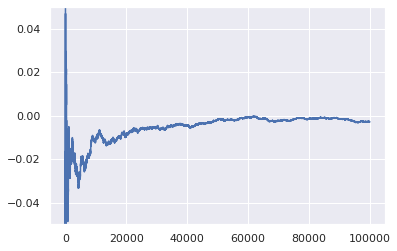

In [5]:
# S3 g_tilde simulation
from spellbook import normal_standard
np.random.seed(SEED)

M = 100000

estimated_values_g_tilde, estimated_tilde  = run_simulation(h, g_tilde, normal_standard, M)
plt.plot(estimated_values_g_tilde)
plt.ylim(-0.05, 0.05)
plt.show()

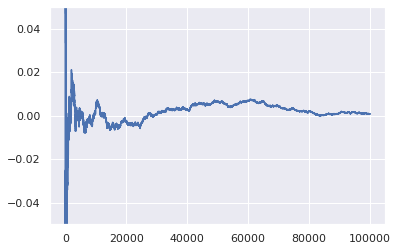

In [6]:
# S3 normal_standard simulation

M = 100000

estimated_values_normal_standard, estimated_normal = run_simulation(h, normal_standard, normal_standard, M)
plt.plot(estimated_values_normal_standard)
plt.ylim(-0.05, 0.05)
plt.show()

In [7]:
# S3 check inequalities
np.random.seed(SEED)

var_tilde = []
var_norm = []

M = 10000

for i in range(1000):
    var_tilde.append(run_simulation(h, g_tilde, normal_standard, M)[0][-1]*M**0.5)
    var_norm.append(run_simulation(h, normal_standard, normal_standard, M)[0][-1]*M**0.5)

In [8]:
print(np.array(var_tilde).var(), np.array(var_norm).var())

0.6462439161887115 0.8895797823300297


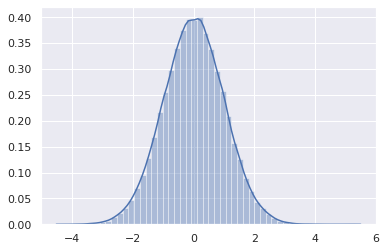

In [9]:
sns.distplot(estimated_normal)

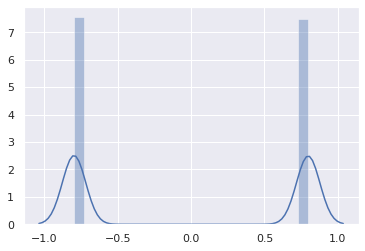

In [10]:
sns.distplot(estimated_tilde)

In [11]:
print(estimated_normal.var(), estimated_tilde.var())

0.9961142087693273 0.636611794503242


In [12]:
# S4
from spellbook import laplace, AdaptiveSampling
np.random.seed(SEED)

advs = AdaptiveSampling(h, [normal_standard, g_tilde, laplace], normal_standard)
history = advs.fit()

Algorithm converged on iteration 77


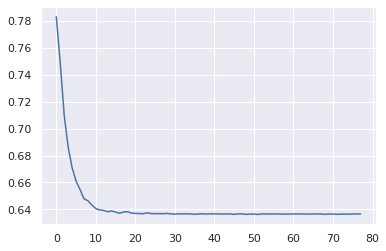

In [13]:
plt.plot(history[2])

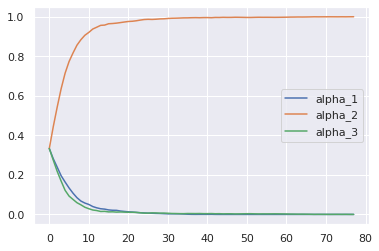

In [14]:
plt.plot(np.vstack(history[0])[:, 0], label="alpha_1")
plt.plot(np.vstack(history[0])[:, 1], label="alpha_2")
plt.plot(np.vstack(history[0])[:, 2], label="alpha_3")
plt.legend()
plt.show()

In [15]:
# S5
from spellbook import g_hyperbolic
np.random.seed(SEED)

advs = AdaptiveSampling(h, [g_polynomial, g_hyperbolic, uniform_0_1], uniform_0_1)
history = advs.fit(tolerance=1e-4)

Algorithm converged on iteration 121


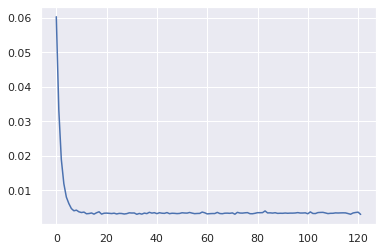

In [16]:
plt.plot(history[2])

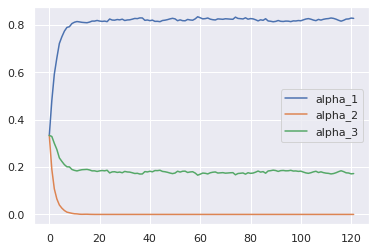

In [20]:
plt.plot(np.vstack(history[0])[:, 0], label="alpha_1")
plt.plot(np.vstack(history[0])[:, 1], label="alpha_2")
plt.plot(np.vstack(history[0])[:, 2], label="alpha_3")
plt.legend()
plt.show()

In [21]:
advs.alphas

array([0.82743351, 0.        , 0.17256649])